In [7]:
import json


with open('OA_Pairs.json','r') as f:
    OAPairsAll = json.load(f)
    
OAPairs = []
for pairs in OAPairsAll.values():
    OAPairs.extend(pairs)
    
    
OAPairs = list(set(tuple(pair) for pair in OAPairs))


In [19]:
with open('unique_OA_Pairs.json','w') as f:
    json.dump(OAPairs, f)

In [13]:
OAPairs[150]

('handbag', 'read')

In [18]:
from OA_Candidate_Sampler import OACandidateSampler
import torch
# Example usage:
batch_size = 4
input_dim = 256  # Example input feature dimension
hidden_dim = 512
num_oas = 100  # Example number of object-action pairs
top_k = 5

# Instantiate the model
model = OACandidateSampler(num_oas)

# Example input (encoded features from the backbone, e.g., ResNet)
encoded_features = torch.randn(batch_size, 49, input_dim)  # Example shape

# Forward pass to get top-K OA candidates
indices, confidences = model(encoded_features)

print("Top-K OA Candidates (indices):", indices)
print("Top-K OA Candidates (confidences):", confidences)


torch.Size([4, 256])
Top-K OA Candidates (indices): tensor([[48, 44, 52, 69, 68],
        [69, 93, 58, 72, 13],
        [69, 93, 72,  0, 25],
        [52, 69, 68, 41, 22]])
Top-K OA Candidates (confidences): tensor([[0.5172, 0.5170, 0.5149, 0.5148, 0.5132],
        [0.5150, 0.5149, 0.5136, 0.5135, 0.5133],
        [0.5183, 0.5161, 0.5144, 0.5138, 0.5138],
        [0.5148, 0.5131, 0.5129, 0.5125, 0.5123]], grad_fn=<TopkBackward0>)


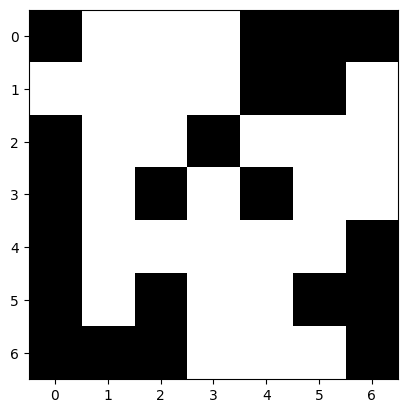

In [44]:
import SpatialFeatureGenerator

from importlib import reload

reload(SpatialFeatureGenerator)


means = {(1,2):2}
logvars = {(1,2):2}
num_oas = 1
spatialGenerator = SpatialFeatureGenerator.SpatialFeatureGenerator(5,means,logvars)
output = spatialGenerator([2])

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(output.detach().numpy()[0], cmap = 'gray')


In [33]:
emb = torch.nn.Embedding(num_oas, 7 * 7)
emb

Embedding(1, 49)

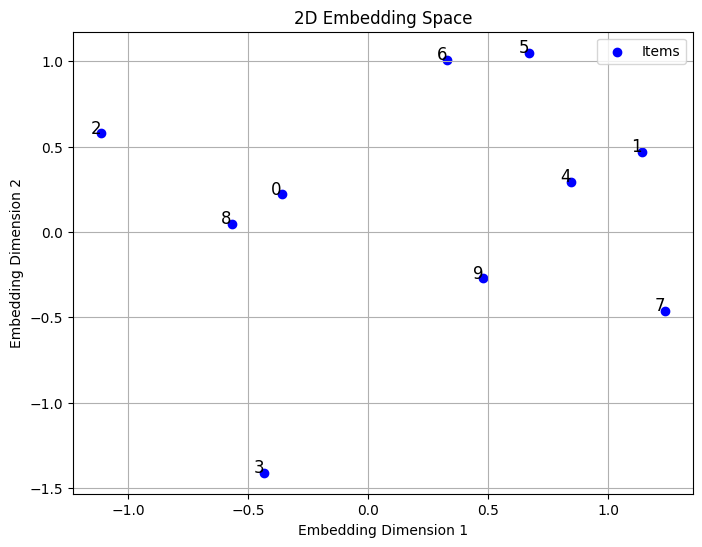

In [24]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define parameters
num_items = 10  # Number of unique items to embed
embedding_dim = 2  # Size of the embedding space (2D)

# Initialize the embedding layer
embedding_layer = nn.Embedding(num_embeddings=num_items, embedding_dim=embedding_dim)

# Create input indices (e.g., indices of items)
indices = torch.arange(num_items)  # [0, 1, 2, ..., num_items-1]

# Get the embeddings for the indices
embeddings = embedding_layer(indices)  # Shape: (num_items, embedding_dim)

# Convert to NumPy for visualization
embeddings_np = embeddings.detach().numpy()

# Visualize the embedding space
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_np[:, 0], embeddings_np[:, 1], c='blue', label='Items')

# Annotate each point with its index
for i, (x, y) in enumerate(embeddings_np):
    plt.text(x, y, str(i), fontsize=12, ha='right')

plt.title('2D Embedding Space')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.grid(True)
plt.legend()
plt.show()
